## Lin-Kernighan-Helsgaun meta-heuristic example

The meta-heuristic used is K. Helsgaun's [LKH-3](http://akira.ruc.dk/~keld/research/LKH-3/), an extension to [LKH-2](http://akira.ruc.dk/~keld/research/LKH/).

- K. Helsgaun, [An Extension of the Lin-Kernighan-Helsgaun TSP Solver for Constrained Traveling Salesman and Vehicle Routing Problems](http://akira.ruc.dk/~keld/research/LKH-3/LKH-3_REPORT.pdf). Technical Report, Roskilde University, 2017.

Notes:
- OptiWindNet interfaces with the LKH solver through temporary files and system calls to the `LKH` executable, which must be in the **PATH** environment variable as seen from the Python code.
- Keld Helsgaun distributes his implementation (for academic and non-commercial use) as C source code and as a Windows binary at <http://akira.ruc.dk/~keld/research/LKH-3/>.
- OptiWindNet's LKH wrapper can only handle single-substation locations at the moment

LKH can only produce *radial* topologies. Since a *radial* topology is a special case of the *branched* topology, solutions produced by this method can be used to warm-start both *branched*- and *radial*-topology models.

If a routeset is desired, use *PathFinder*.

In [1]:
from optiwindnet.importer import load_repository
from optiwindnet.svg import svgplot
from optiwindnet.baselines.lkh import iterative_lkh
from optiwindnet.mesh import make_planar_embedding
from optiwindnet.pathfinding import PathFinder
from optiwindnet.interarraylib import G_from_S, as_normalized

### Load Greater Gabbard Inner

In [2]:
locations = load_repository()

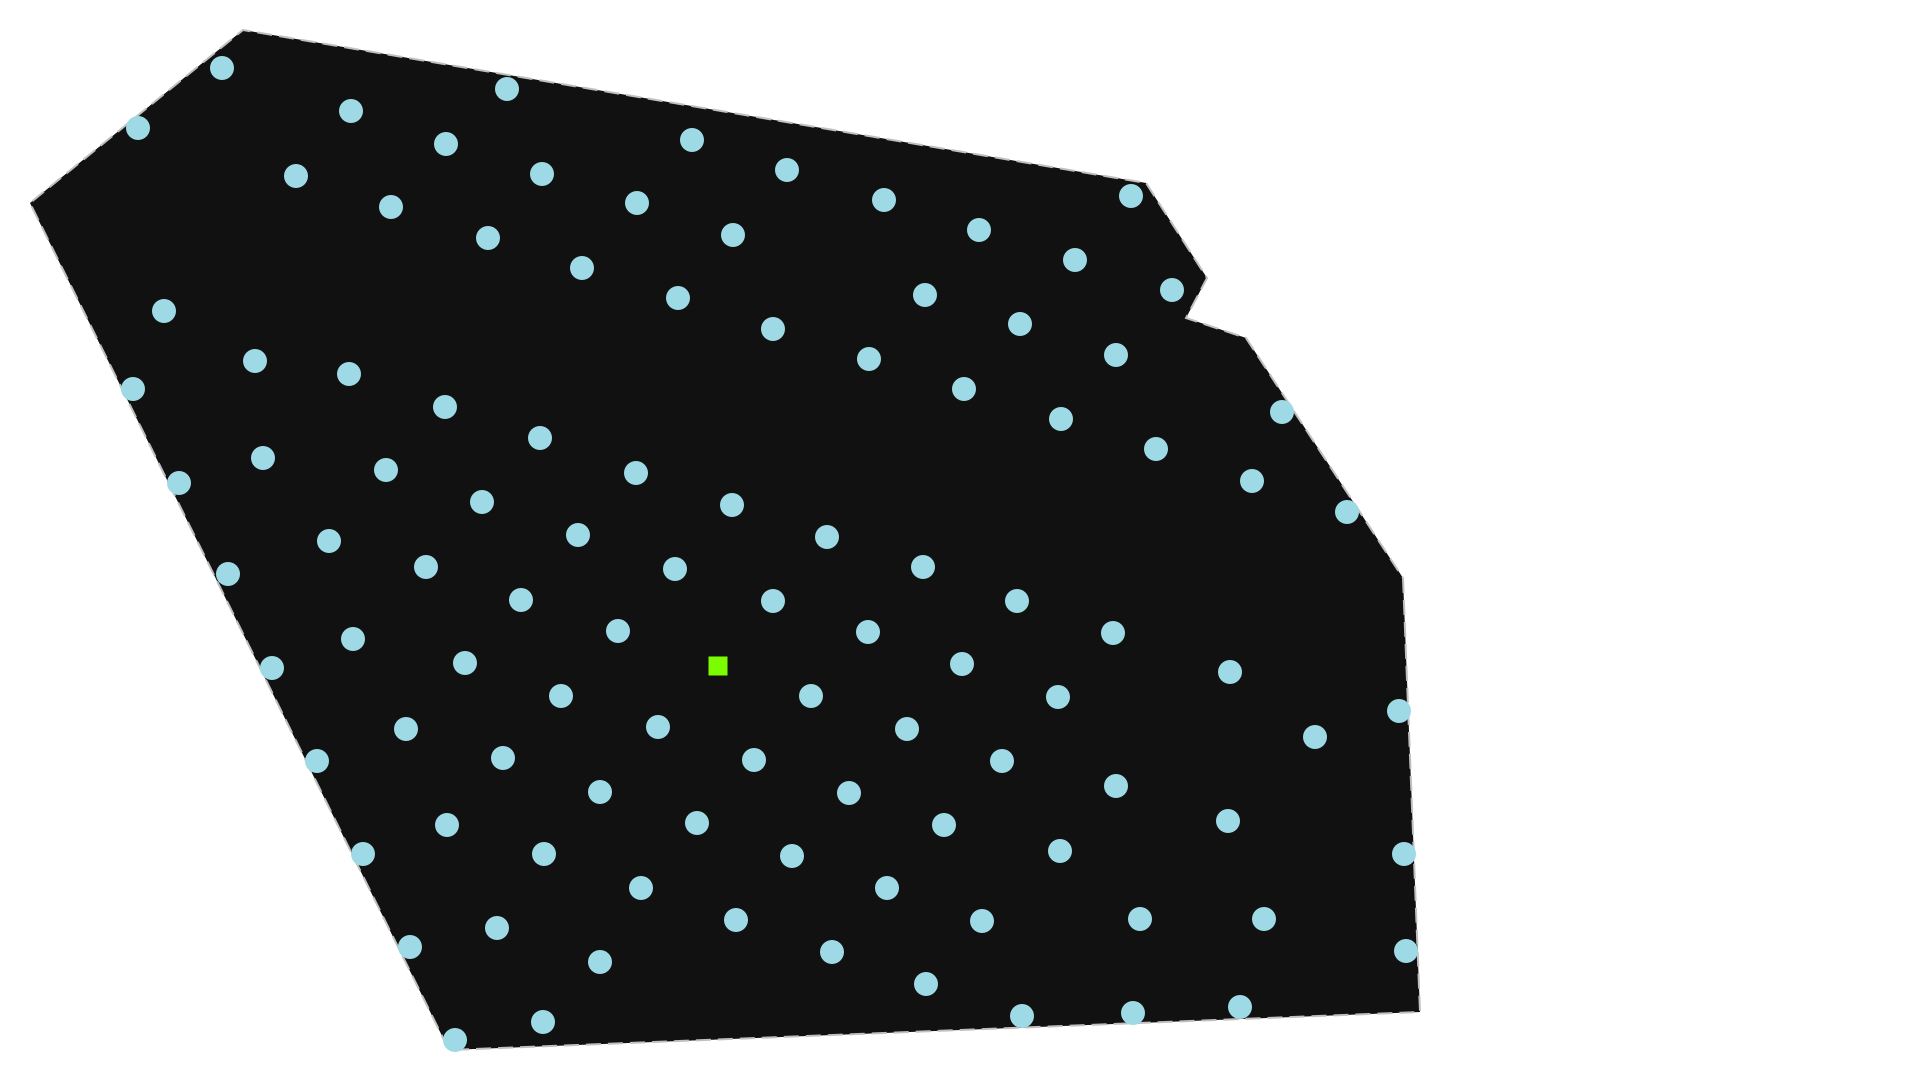

In [3]:
L = locations.gabbin
svgplot(L)

### Optimize Greater Gabbard Inner

0.99


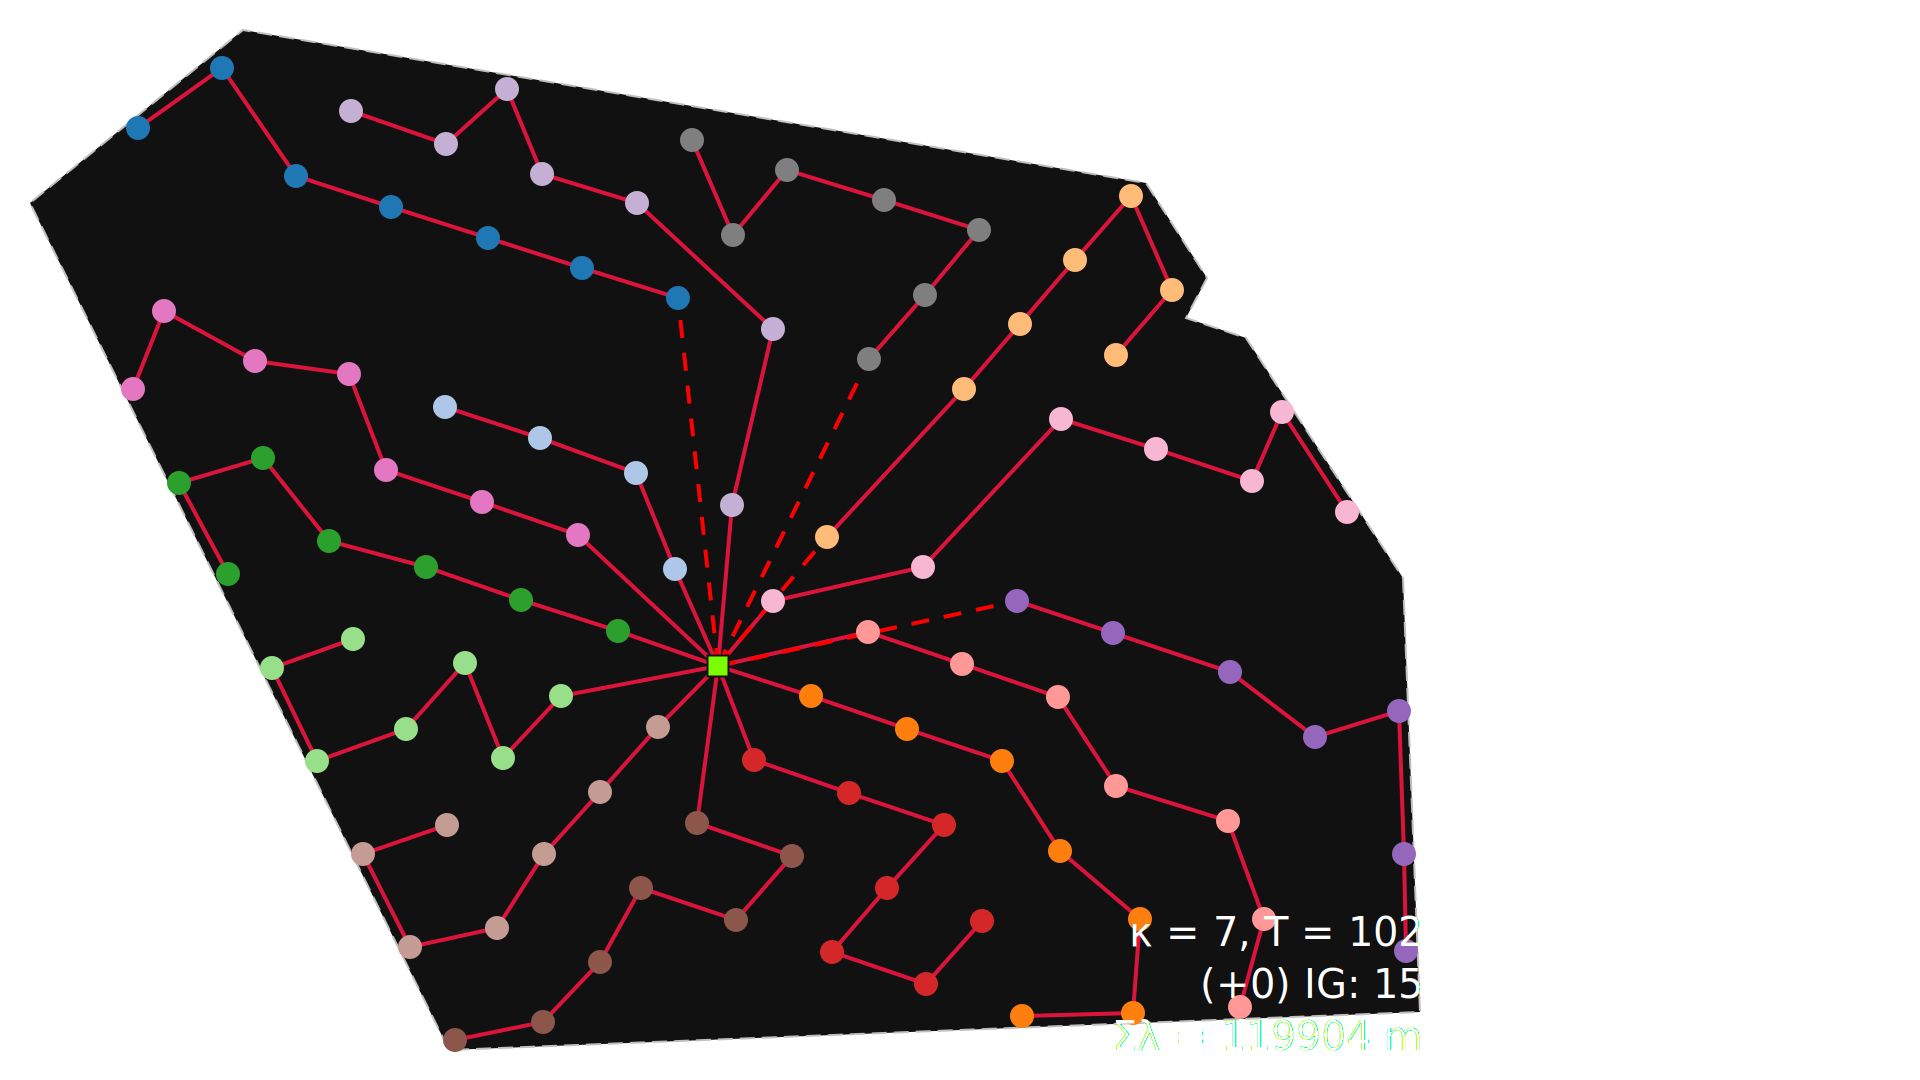

In [4]:
P, A = make_planar_embedding(L)
S = iterative_lkh(as_normalized(A), capacity=7, time_limit=2)
print(S.graph['solution_time'])
G = G_from_S(S, A)
svgplot(G)

### Route the feeders so as to avoid crossings

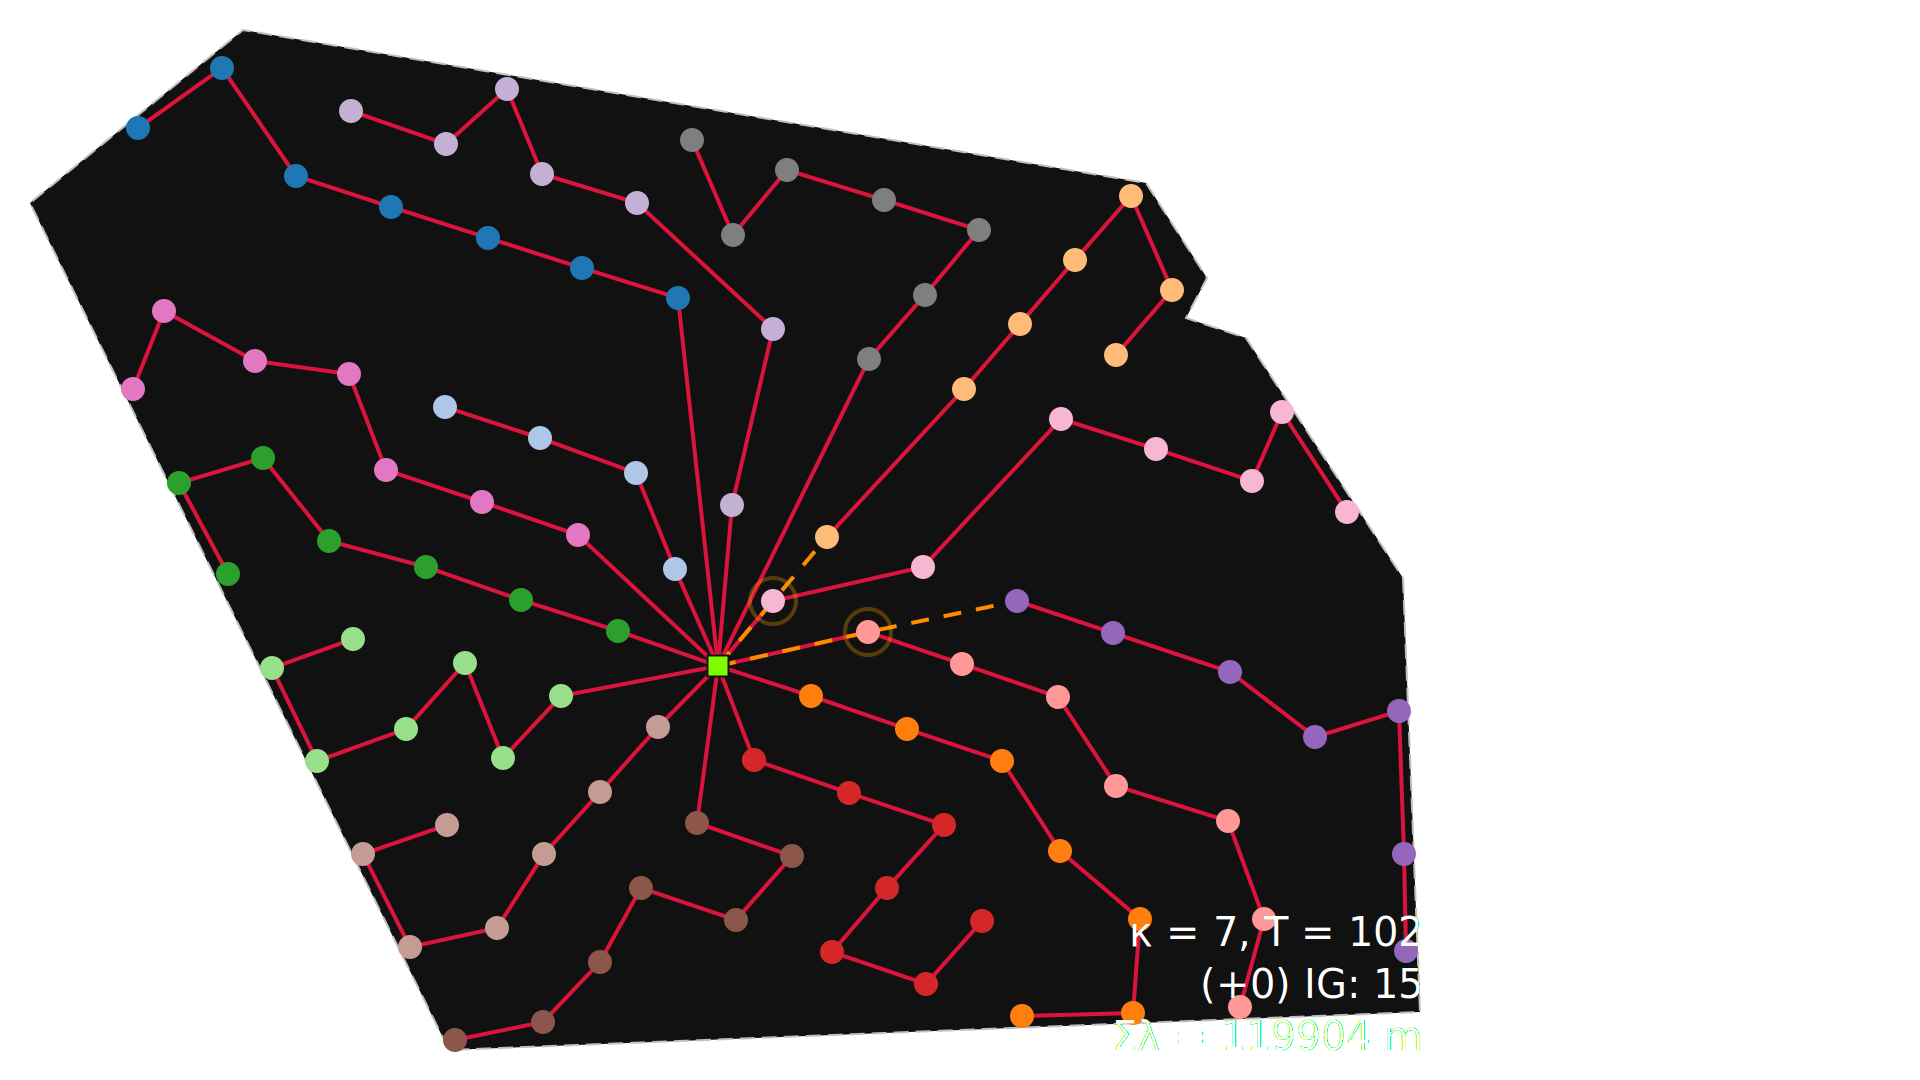

In [5]:
H = PathFinder(G, P, A).create_detours()
svgplot(H)